In [1]:
'''
Date: 20230524
Aim: background subtraction of calibrated images with water
Author: Yike Xie
'''

'\nDate: 20230524\nAim: background subtraction of calibrated images with water\nAuthor: Yike Xie\n'

In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import h5py

import matplotlib.pyplot as plt
from skimage import filters
import pickle

# background_substraction

In [3]:
# create image array
def img_array(img):
    data = np.empty([15] + list(img[img.files[1]].shape))
    files = [i for i in img.files if 'wls' in i]
    for i, file in enumerate(files):
        data[i] = img[file].astype('uint16')
    return data # type float64

# image blurring
from skimage.filters import gaussian
def blur(img, sigma=1, axis=0):
    blurred_img = gaussian(img, sigma=sigma,truncate=3.5, channel_axis=axis, preserve_range=True)
    return blurred_img # type float64

# background subtraction
def subtract(img, blurred_B):
    subtracted_img = (img - blurred_B)
    return subtracted_img

# image flattening
def flatten(img, blurred_B, blurred_C):
    flatten_img = (img - blurred_B) / (blurred_C - blurred_B)
    return flatten_img # type float64

# image saving
def save_npz(img, mask, name, path=False):
    img_dic = {}
    files = ['wls_325_414',
             'wls_343_414',
             'wls_370_414',
             'wls_343_451',
             'wls_370_451',
             'wls_373_451',
             'wls_343_575',
             'wls_393_575',
             'wls_406_575',
             'wls_441_575',
             'wls_400_594',
             'wls_406_594',
             'wls_431_594',
             'wls_480_594',
             'wls_339_575']
    
    for i, file in enumerate(files):
        img_dic[file] = img[i]
    img_dic['segmentation'] = mask
    
    if path is not False:
        np.savez_compressed(path + name + '.npz', **img_dic) # type uint16

In [4]:
fdn = '/home/yike/phd/cancer_cells_img_seq/figures/segmentation/'
fdn_cal1 = os.path.join(fdn, 'seg_cal_2/')
fdn_cal2 = os.path.join(fdn, 'seg_cal_3/')
fns = os.listdir(fdn_cal1)

fdn_cell = '/home/yike/phd/cancer_cells_img_seq/figures/segmentation/cancer100cells/'
sig_fns = [i for i in os.listdir(fdn_cell) if '.npz' in i]
fdn_dis = os.path.join(fdn_cell, 'doublets/distant_cells')
dis_fns = os.listdir(fdn_dis)
fdn_db = os.path.join(fdn_cell, 'doublets/doublets')
db_fns = os.listdir(fdn_db)

In [14]:
fdn_save = '/home/yike/phd/cancer_cells_img_seq/figures/segmentation/flatten_iamges/'

fns = ['C3_S1.npz']
for i, fn in enumerate(fns):
    print('{}: {}/{}'.format(fn.split('.')[0], i+1, len(fns)))

    print('load water control...')
    ctl1_npz = np.load(os.path.join(fdn + 'seg_water_1/', fn))
    ctl2_npz = np.load(os.path.join(fdn + 'seg_water_2/', fn))

    print('load calibration sample...')
    cal1_npz = np.load(os.path.join(fdn_cal1, fn))
    cal2_npz = np.load(os.path.join(fdn_cal2, fn))
    
    print('load sample...')
    if fn in sig_fns:
        cell_npz = np.load(os.path.join(fdn_cell, fn))
    elif fn in dis_fns:
        cell_npz = np.load(os.path.join(fdn_dis, fn))
    elif fn in db_fns:
        cell_npz = np.load(os.path.join(fdn_db, fn))
        
    ctl1 = img_array(ctl1_npz) # unit16
    ctl2 = img_array(ctl2_npz) # unit16
    cal1 = img_array(cal1_npz) # unit16
    cal2 = img_array(cal2_npz) # unit16 
    cell = img_array(cell_npz) # unit16
    
    print('blur water...')
    bl_ctl1 = blur(ctl1, sigma=1, axis=0)
    bl_ctl2 = blur(ctl2, sigma=1, axis=0)
    
    print('blur calibration sample...')
    bl_cal1 = blur(cal1, sigma=1, axis=0)
    bl_cal2 = blur(cal2, sigma=1, axis=0)
    
    ########################################
#     print('background subtraction...')
#     sb_cell = subtract(cell, (bl_ctl1 + bl_ctl2) / 2)
    
    print('flatten image')
    sb_cell = flatten(cell, (bl_ctl1 + bl_ctl2) / 2, (bl_cal1 + bl_cal2) / 2)
    
    mask = cell_npz['new_segmentation']
    
    print('blur cell')
    bl_cell = blur(sb_cell)
    
    print('save as npz')
    save_npz(bl_cell, mask, fn.split('.')[0], path=fdn_save)

C6_S40: 1/121
load water control...
load calibration sample...
load sample...
blur water...
blur calibration sample...
flatten image
blur cell
save as npz
I8_S72: 2/121
load water control...
load calibration sample...
load sample...
blur water...
blur calibration sample...
flatten image
blur cell
save as npz
J3_S8: 3/121
load water control...
load calibration sample...
load sample...
blur water...
blur calibration sample...
flatten image
blur cell
save as npz
H10_S97: 4/121
load water control...
load calibration sample...
load sample...
blur water...
blur calibration sample...
flatten image
blur cell
save as npz
J10_S99: 5/121
load water control...
load calibration sample...
load sample...
blur water...
blur calibration sample...
flatten image
blur cell
save as npz
G11_S109: 6/121
load water control...
load calibration sample...
load sample...
blur water...
blur calibration sample...
flatten image
blur cell
save as npz
C7_S53: 7/121
load water control...
load calibration sample...
load

<ipython-input-12-c703a6809340>:22: RuntimeWarning: invalid value encountered in true_divide
  flatten_img = (img - blurred_B) / (blurred_C - blurred_B)


E7_S55: 34/121
load water control...
load calibration sample...
load sample...
blur water...
blur calibration sample...
flatten image
blur cell
save as npz
G12_S122: 35/121
load water control...
load calibration sample...
load sample...
blur water...
blur calibration sample...
flatten image
blur cell
save as npz
F11_S108: 36/121
load water control...
load calibration sample...
load sample...
blur water...
blur calibration sample...
flatten image
blur cell
save as npz
M5_S37: 37/121
load water control...
load calibration sample...
load sample...
blur water...
blur calibration sample...
flatten image
blur cell
save as npz
O10_S104: 38/121
load water control...
load calibration sample...
load sample...
blur water...
blur calibration sample...
flatten image
blur cell
save as npz
E12_S120: 39/121
load water control...
load calibration sample...
load sample...
blur water...
blur calibration sample...
flatten image
blur cell
save as npz
M7_S63: 40/121
load water control...
load calibration sa

<ipython-input-12-c703a6809340>:22: RuntimeWarning: divide by zero encountered in true_divide
  flatten_img = (img - blurred_B) / (blurred_C - blurred_B)


G8_S70: 75/121
load water control...
load calibration sample...
load sample...
blur water...
blur calibration sample...
flatten image
blur cell
save as npz
N9_S90: 76/121
load water control...
load calibration sample...
load sample...
blur water...
blur calibration sample...
flatten image
blur cell
save as npz
H11_S110: 77/121
load water control...
load calibration sample...
load sample...
blur water...
blur calibration sample...
flatten image
blur cell
save as npz
L6_S49: 78/121
load water control...
load calibration sample...
load sample...
blur water...
blur calibration sample...
flatten image
blur cell
save as npz
N11_S116: 79/121
load water control...
load calibration sample...
load sample...
blur water...
blur calibration sample...
flatten image
blur cell
save as npz
H12_S123: 80/121
load water control...
load calibration sample...
load sample...
blur water...
blur calibration sample...
flatten image
blur cell
save as npz
C4_S14: 81/121
load water control...
load calibration samp

In [30]:
img = np.load('/home/yike/phd/cancer_cells_img_seq/figures/segmentation/flatten_iamges/O4_S26.npz')

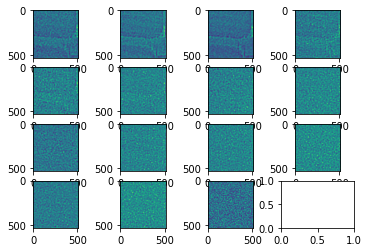

In [41]:
cal = (bl_cal1 + bl_cal2) / 2
fig, axs = plt.subplots(4, 4)
axs = axs.ravel()
for i in range(15):
    axs[i].imshow(cal[i])

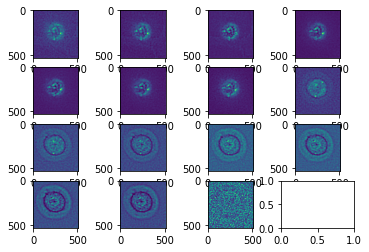

In [42]:
fig, axs = plt.subplots(4, 4)
axs = axs.ravel()
for i in range(15):
    axs[i].imshow(cell[i])

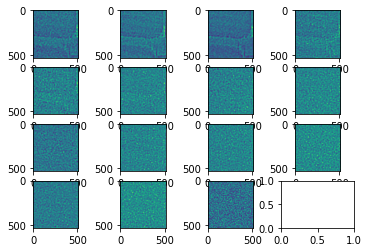

In [43]:
water = (bl_ctl1 + bl_ctl2) / 2
fig, axs = plt.subplots(4, 4)
axs = axs.ravel()
for i in range(15):
    axs[i].imshow(cal[i])

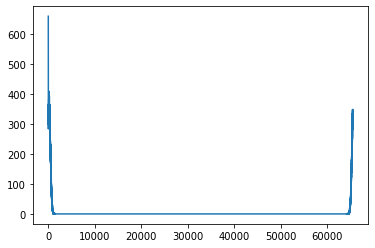

In [91]:
y = np.bincount(cal_sub[0].astype('uint16').ravel())
x = range(len(y))
plt.plot(x, y)

In [89]:
cal_sub[0].astype('uint16')

array([[  578,   511,   402, ...,   185,   145,    61],
       [  608,   559,   436, ...,    89,    66, 65534],
       [  599,   586,   453, ..., 65526, 65520, 65475],
       ...,
       [  205,   165,   120, ..., 65146, 65175, 65227],
       [  189,    86, 65521, ..., 65251, 65274, 65361],
       [  133, 65522, 65387, ..., 65369, 65388, 65507]], dtype=uint16)

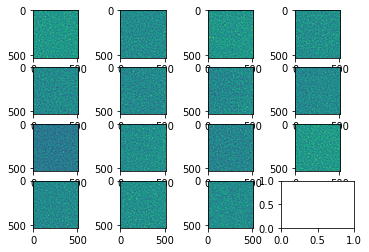

In [46]:
cal_sub = cal - water
fig, axs = plt.subplots(4, 4)
axs = axs.ravel()
for i in range(15):
    axs[i].imshow(cal_sub[i])

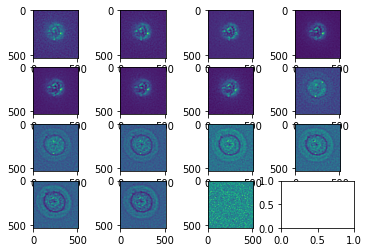

In [47]:
cell_sub = cell - water
fig, axs = plt.subplots(4, 4)
axs = axs.ravel()
for i in range(15):
    axs[i].imshow(cell_sub[i])

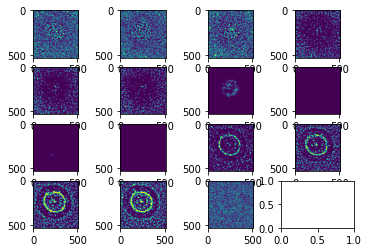

In [81]:
final = (cell_sub / cal_sub).astype('uint16')
fig, axs = plt.subplots(4, 4)
axs = axs.ravel()
for i in range(15):
    axs[i].imshow(final[i])

In [73]:
for i in range(15):
    print('{}: max{} min{}'.format(i, bl_cell[i].max(), bl_cell[i].min()))

0: max22249.200623400277 min-10080.766462772419
1: max118883.0898680484 min-8823.954036059255
2: max21807.30942808404 min-61934.85492145646
3: max2097.492652812607 min-41980.774636007234
4: max9648.510564813425 min-1735.4366624119675
5: max2119.7916831359703 min-104341.6773283453
6: max4.598087659907484 min-0.4607659731859963
7: max2.008211930697964 min-0.7612433442098102
8: max1.9774482372137747 min-2.3594293411956713
9: max1.4980011115765572 min-0.940731781198537
10: max234.1099924931323 min-216.43018722160545
11: max2826.937118645186 min-1573.5496059770621
12: max110199.36526846972 min-2475.9795322392424
13: max1888.6973684748095 min-1397.4892181960147
14: max63718.46990668514 min-26223.5390945466


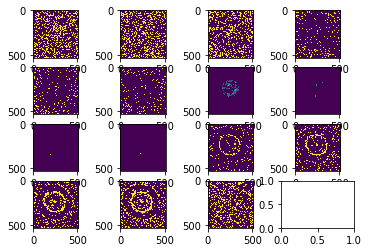

In [75]:
bl_final = bl_cell.astype('uint16')
fig, axs = plt.subplots(4, 4)
axs = axs.ravel()
for i in range(15):
    axs[i].imshow(bl_final[i], interpolation='nearest', )

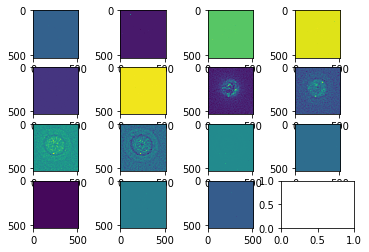

In [82]:
fig, axs = plt.subplots(4, 4)
axs = axs.ravel()
for i in range(15):
    axs[i].imshow(bl_cell[i], interpolation='nearest', )

# feature_extraction

In [10]:
def extract_features(fdn_sub, fdn_seg, fn):
    img = np.load(os.path.join(fdn_sub, fn))
    mask = img['segmentation']
    seg_img = np.load(os.path.join(fdn_seg, fn))
    
    # Area
    area = mask.sum()
    # Horizontal length
    length = mask.any(axis=0).nonzero()[0]
    length = length[-1] - length[0]
    # Vertical width (waist line)
    width = mask.any(axis=1).nonzero()[0]
    width = width[-1] - width[0]
    # Eccentricity
    ecc = length / width

    # Wavelengths
    wls = [(int(wl.split('_')[1]), int(wl.split('_')[2])) for wl in img.files[:-1]]
    
    # Total Intensity
    total_int = [(img[wl] * mask).sum() for wl in img.files[:-1]]
    
    # Average Intensity
    ave_int = [int_i/area for int_i in total_int]
    
    # spectra
    spectra = [(seg_img[wl] * mask).sum() for wl in img.files[:-1]]
    
    feas = {
        'area': area,
        'length': length,
        'width': width,
        'eccentricity': ecc,
        'image': fn.split('/')[-1].split('.')[0],
        'wavelengths': wls,
        'spectra': spectra,
        'total_intensity': total_int,
        'ave_intensity': ave_int,
    }

    return feas

In [ ]:
fdn = '/home/yike/phd/cancer_cells_img_seq/figures/segmentation/'
fdn_cell = '/home/yike/phd/cancer_cells_img_seq/figures/segmentation/cancer100cells/'
sig_fns = [i for i in os.listdir(fdn_cell) if '.npz' in i]
fdn_dis = os.path.join(fdn_cell, 'doublets/distant_cells')
dis_fns = os.listdir(fdn_dis)
fdn_db = os.path.join(fdn_cell, 'doublets/doublets')
db_fns = os.listdir(fdn_db)

In [11]:
# cells
fdn_sub = '/home/yike/phd/cancer_cells_img_seq/figures/segmentation/background_subtraction/'
fdn_cell = '/home/yike/phd/cancer_cells_img_seq/figures/segmentation/cancer100cells/'
sig_fns = [i for i in os.listdir(fdn_cell) if '.npz' in i]
fdn_dis = os.path.join(fdn_cell, 'doublets/distant_cells')
dis_fns = os.listdir(fdn_dis)
fdn_db = os.path.join(fdn_cell, 'doublets/doublets')
db_fns = os.listdir(fdn_db)

features = []
for i, fn in enumerate([i for i in os.listdir(fdn_sub) if '.npz' in i]):
    print('{} cell: {}'.format(i+1, fn.split('.')[0]))
    if fn in sig_fns:
        fdn_seg = fdn_cell
    elif fn in dis_fns:
        fdn_seg = fdn_dis
    elif fn in db_fns:
        fdn_seg = fdn_db
    feas = extract_features(fdn_sub, fdn_seg, fn)
    features.append(feas)
features_all = pd.DataFrame(features)

# save features as a pickle file
with open(fdn_sub + 'bkg_sub_features.pkl', 'wb') as f:
    pickle.dump(features_all, f)

1 cell: C6_S40
2 cell: I8_S72
3 cell: J3_S8
4 cell: H10_S97
5 cell: J10_S99
6 cell: G11_S109
7 cell: C7_S53
8 cell: L3_S10
9 cell: C5_S27
10 cell: G3_S5
11 cell: E11_S107
12 cell: J12_S125
13 cell: D5_S28
14 cell: H8_S71
15 cell: I12_S124
16 cell: F8_S69
17 cell: G9_S83
18 cell: M4_S24
19 cell: I11_S111
20 cell: G5_S31
21 cell: J8_S73
22 cell: I10_S98
23 cell: I7_S59
24 cell: F12_S121
25 cell: O4_S26
26 cell: L9_S88
27 cell: G7_S57
28 cell: E10_S94
29 cell: I4_S20
30 cell: J9_S86
31 cell: C11_S105
32 cell: K10_S100
33 cell: F7_S56
34 cell: E7_S55
35 cell: G12_S122
36 cell: F11_S108
37 cell: M5_S37
38 cell: O10_S104
39 cell: E12_S120
40 cell: M7_S63
41 cell: E8_S68
42 cell: E5_S29
43 cell: D12_S119
44 cell: E9_S81
45 cell: J7_S60
46 cell: O11_S117
47 cell: F10_S95
48 cell: D11_S106
49 cell: F5_S30
50 cell: K6_S48
51 cell: L10_S101
52 cell: N6_S51
53 cell: K8_S74
54 cell: J6_S47
55 cell: N8_S77
56 cell: F9_S82
57 cell: N5_S38
58 cell: C8_S66
59 cell: M10_S102
60 cell: I6_S46
61 cell: D9_

In [454]:
# check the percentage of cells with positive intensities after background subtraction under each channel
df = pd.DataFrame([], index=features_all['image'])
for i, wl in enumerate(features_all.loc[0]['wavelengths']):
    df['{} {}'.format(str(wl[0]), str(wl[1]))] = [fea[i] for fea in features_all['total_intensity']]
    
neg = []
for i in df.index:
    neg.append(sum(1 for n in df.loc[i] if n < 0))
df['total'] = neg

for col in df.columns:
    n = sum(1 for i in df[col] if i < 0)
    print('{} {}'.format(col, str(n * 100/122) + '%'))

325 414 0.0%
343 414 0.0%
370 414 0.0%
343 451 0.0%
370 451 0.0%
373 451 0.0%
343 575 0.0%
393 575 9.01639344262295%
406 575 23.770491803278688%
441 575 25.40983606557377%
400 594 29.508196721311474%
406 594 32.78688524590164%
431 594 33.60655737704918%
480 594 31.9672131147541%
339 575 56.557377049180324%
total 0.0%
